In [ ]:
pip install -U scikit-learn

In [9]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/Users/lenovo/Downloads/HousingData.csv')

In [21]:
def clean_data(df):
    df = df.dropna()

    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

    return df

In [22]:
df = clean_data(df)

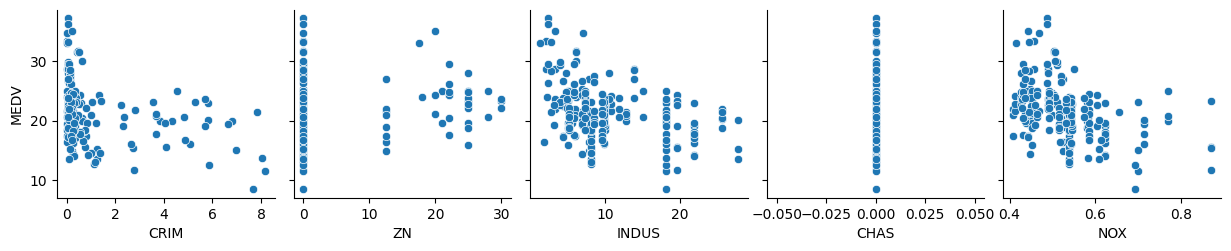

In [25]:
sns.pairplot(df, x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX'], y_vars='MEDV', diag_kind='kde')


In [28]:
# MACHINE LEARNING

## Spliting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Training the linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 5.098328945973743
R-squared: 0.7824596647797841
